<h1 align=center><font size = 5>Data Preparation</font></h1>


In this lab, you will learn how to load images and manipulate them for training using Keras ImageDataGenerator.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

## Download Data


For your convenience, I have placed the data on a server which you can retrieve and unzip easily using the **skillsnetwork.prepare** command. So let's run the following line of code to get the data. Given the large size of the image dataset, it might take some time depending on your internet speed.


In [2]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week2.zip

--2025-01-22 21:58:16--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week2.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 260502910 (248M) [application/zip]
Saving to: ‘concrete_data_week2.zip.2’

concrete_data_week2 100%[===================>] 248.43M  33.9MB/s    in 8.0s    

2025-01-22 21:58:24 (31.0 MB/s) - ‘concrete_data_week2.zip.2’ saved [260502910/260502910]



In [3]:
!unzip concrete_data_week2 > /dev/null

replace concrete_data_week2/Positive/16679_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


You can check the content of <code>./concrete_data_week2</code> by running the following:


In [4]:
!ls ./concrete_data_week2

Negative  Positive


In [5]:
os.listdir('concrete_data_week2')

['Positive', '.DS_Store', 'Negative']

## Construct an ImageDataGenerator Instance


In this section, you will learn how to define a Keras ImageDataGenerator instance and use it to load and manipulate data for building a deep learning model.


In [6]:
dataset_dir = './concrete_data_week2'

#### Standard ImageDataGenerator


You can define a standard one like this, where you are simply using the ImageDataGenerator to train your model in batches.


In [7]:
# instantiate your image data generator
data_generator = ImageDataGenerator()

Next, you use the <code>flow_from_directory</code> methods to loop through the images in batches. In this method, you pass the directory where the images reside, the size of each batch, *batch_size*, and since batches are sampled randomly, then you can also specify a random seed, *seed*, if you would like to reproduce the batch sampling. In case you would like to resize your images, then you can using the *target_size* argument to accomplish that.


In [8]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


Now, to access the batches, you use the <code>next</code> method as follows:


In [ ]:
first_batch = next(image_generator)
first_batch

As you can see, this returned the images along with their labels. Therefore, the following returns the images only,


In [ ]:
first_batch_images = first_batch[0]
first_batch_images

and the following returns the labels only.


In [11]:
first_batch_labels = first_batch[1]
first_batch_labels

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

#### Custom ImageDataGenerator


You can also specify some transforms, like scaling, rotations, and flips, that you would like applied to the images when you define an ImageDataGenerator object. Say you want to normalize your images, then you can define your ImageDataGenerator instance as follows:


In [12]:
# instantiate your image data generator
data_generator = ImageDataGenerator(
    rescale=1./255
)

And then you proceed with defining your *image_generator* using the *flow_from_directory* method, just like before.


In [13]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


However, now we explore the first batch using the *next* method,


In [ ]:
first_batch = next(image_generator)
first_batch_images = first_batch[0]
first_batch_labels = first_batch[1]
first_batch

In [ ]:
first_batch_images

we find that the values are not integer values anymore, but scaled resolution since the original number are divided by 255.


## Visualize Batches of Images


Let write some code to visualize a batch. We will use subplots in order to make visualizing the images easier.


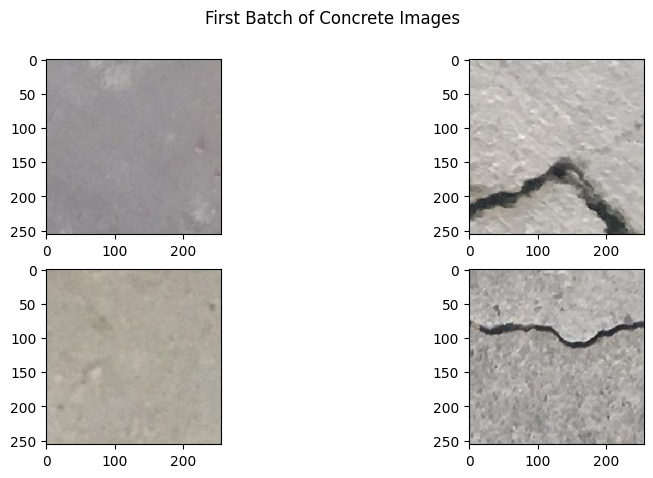

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,5)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1:
        image_data = first_batch_images[ind] #.astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images')
plt.show()

Remember that batches are sampled randomly from the data. In our first batch, we ended up with two negative image and two positive images.


**Important Note**: Because of a bug with the imshow function in Matplotlib, if you are plotting the unscaled RGB images, you have to cast the **image_data** to uint8 before you call the <code>imshow</code> function. So In the code above It looks like this:

image_data = first_batch_images[ind].astype(np.uint8)


## Questions


### Question: Create a plot to visualize the images in the third batch.


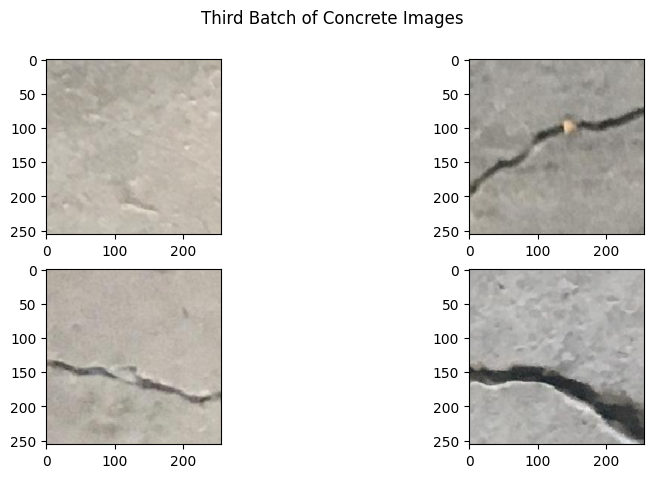

In [17]:
second_batch = next(image_generator)
third_batch = next(image_generator)
third_batch_images = third_batch[0]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,5)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1:
        image_data = third_batch_images[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('Third Batch of Concrete Images')
plt.show()

### Question: How many images from each class are in the fourth batch?


In [18]:
fourth_batch = next(image_generator)
fourth_batch_labels = fourth_batch[1]
fourth_batch_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### Question: Create a plot to visualize the second image in the fifth batch.


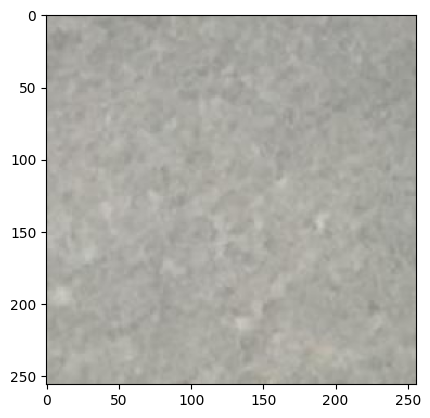

In [19]:
fifth_batch = next(image_generator)
fifty_batch_second_image = fifth_batch[0][1]
plt.imshow(fifty_batch_second_image)

### Question: How many images from each class are in the fifth batch?


In [20]:
fifth_batch_labels = fifth_batch[1]
fifth_batch_labels

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)